In [6]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
torch.cuda.empty_cache()
device = "cuda"

In [7]:
num_vectors = 10000
vector_len = 100

In [8]:
big_matrix = torch.randn(num_vectors, vector_len, device=device)
big_matrix /= big_matrix.norm(p=2, dim=1, keepdim=True)
big_matrix.requires_grad_(True)

tensor([[ 0.1157, -0.0474, -0.0271,  ..., -0.0493,  0.0062,  0.2172],
        [-0.0901, -0.1547,  0.1166,  ...,  0.1463, -0.0248,  0.0007],
        [ 0.0739, -0.1056, -0.0121,  ..., -0.0159,  0.0838,  0.0135],
        ...,
        [-0.0649, -0.1032,  0.0390,  ...,  0.0282, -0.1370, -0.0805],
        [-0.0891, -0.0853,  0.0456,  ..., -0.1944,  0.1932,  0.0306],
        [-0.0587,  0.0722,  0.0897,  ..., -0.0687,  0.1195, -0.1170]],
       device='cuda:0', requires_grad=True)

In [9]:
optimizer = torch.optim.Adam([big_matrix], lr=0.01)
num_steps = 250

losses= []
dot_diff_cutoff = 0.01
big_id = torch.eye(num_vectors, num_vectors, device=device)

In [10]:

for step_num in tqdm(range(num_steps)):
    optimizer.zero_grad()
    dot_products = big_matrix @ big_matrix.T

    diff = dot_products - big_id
    loss = (diff.abs() - dot_diff_cutoff).relu().sum()
    loss += num_vectors * diff.diag().pow(2).sum()
    loss += num_vectors * diff.diag().pow(2).sum()

    loss.backward()
    optimizer.step()
    losses.append(loss.item())

100%|██████████| 250/250 [00:04<00:00, 59.06it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

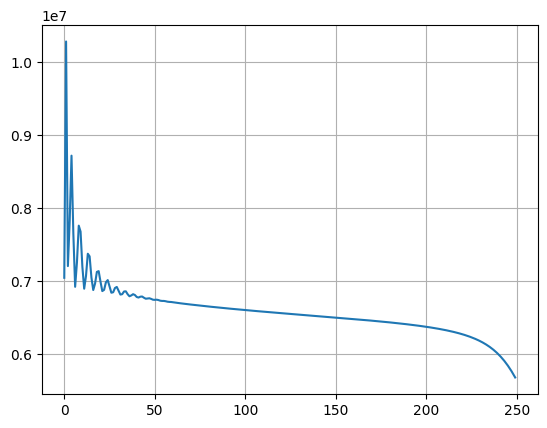

In [11]:
plt.plot(losses)
plt.grid(1)
plt.show

In [12]:
big_matrix[0]

tensor([ 0.1167, -0.0535,  0.0635,  0.1502,  0.0996,  0.0208, -0.2315, -0.2010,
        -0.1249,  0.0221, -0.0022,  0.0672,  0.2095,  0.1509, -0.1689,  0.0835,
        -0.0364, -0.1362,  0.0416, -0.0679, -0.0669, -0.0691,  0.1026,  0.0526,
         0.0810, -0.1529, -0.0805,  0.0844, -0.0639, -0.1691,  0.0316, -0.0013,
        -0.0716, -0.0362, -0.1838,  0.0979,  0.0463, -0.0327, -0.1378,  0.0033,
        -0.0239,  0.1215,  0.0734,  0.0576, -0.0056,  0.0489,  0.0921,  0.1937,
        -0.0971,  0.1148,  0.1032,  0.0079, -0.1201, -0.0157,  0.1109,  0.0063,
        -0.1642, -0.1834, -0.0143,  0.1220, -0.0221, -0.0507,  0.0296, -0.0415,
         0.0433,  0.0514, -0.1210,  0.0483, -0.0596,  0.1331, -0.1332,  0.1051,
         0.1250,  0.0108, -0.0487, -0.1559, -0.0088, -0.0069, -0.0037,  0.1340,
         0.0452, -0.0179,  0.0898,  0.0225, -0.2015, -0.0452, -0.1036,  0.1725,
         0.0866, -0.0147,  0.0041, -0.1084, -0.0309, -0.0072,  0.0759, -0.0279,
         0.0736, -0.0790,  0.0079,  0.19

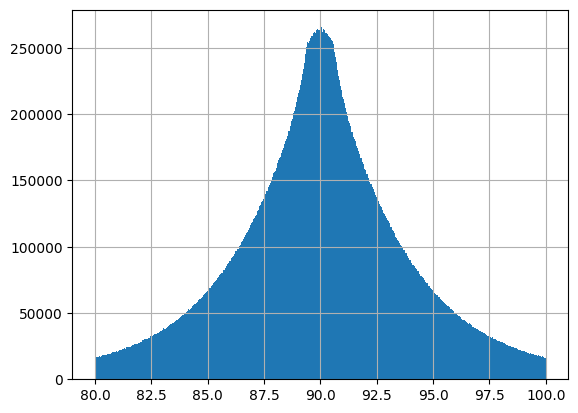

In [15]:
dot_products = big_matrix @ big_matrix.T
norms = torch.sqrt(torch.diag(dot_products))
normed_dot_products = dot_products / torch.outer(norms, norms)
angles_degrees = torch.rad2deg(torch.acos(normed_dot_products))
self_orthogonality_mask = ~(torch.eye(num_vectors, num_vectors).bool())

plt.hist(angles_degrees[self_orthogonality_mask].cpu().detach().numpy().ravel(), bins=1000, range=(80, 100))
plt.grid(1)
plt.show()

In [16]:
print(self_orthogonality_mask)

tensor([[False,  True,  True,  ...,  True,  True,  True],
        [ True, False,  True,  ...,  True,  True,  True],
        [ True,  True, False,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True,  True, False]])


In [17]:
angles_degrees[self_orthogonality_mask]

tensor([ 96.8977,  90.1938, 100.3992,  ...,  77.5173,  87.0899,  86.0620],
       device='cuda:0', grad_fn=<IndexBackward0>)